Casestudy week 10 DS-002

In [143]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
import random
import statsmodels.api as sm

from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [256]:
df=pd.read_csv('google-data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [258]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [259]:
df['date'] = pd.to_datetime(df['Date']).dt.strftime("%d/%m/%y")
df.drop(columns=['Date'],inplace=True)

In [260]:
data=pd.DataFrame()
data['date']=pd.date_range(start = '2013-01-02', end = '2017-12-29')
data['date'] = data['date'].dt.strftime("%d/%m/%y")
data=data.merge(df, how = 'left', on = 'date')

In [261]:
numeric_cols = ['Open', 'High', 'Close', 'Low', 'Adj Close','Volume']
for n_col in numeric_cols:
    data[n_col]=data[n_col].interpolate(method='cubic')

In [262]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 1822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1823 non-null   object 
 1   Open       1823 non-null   float64
 2   High       1823 non-null   float64
 3   Low        1823 non-null   float64
 4   Close      1823 non-null   float64
 5   Adj Close  1823 non-null   float64
 6   Volume     1823 non-null   float64
dtypes: float64(6), object(1)
memory usage: 113.9+ KB


,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,05/01/13,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,06/01/13,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06


In [263]:
a = sm.tsa.seasonal_decompose(data.Close.values, period=100, model='additive')

In [264]:
m = sm.tsa.seasonal_decompose(data.Close.values, period = 100, model = 'multiplicative')

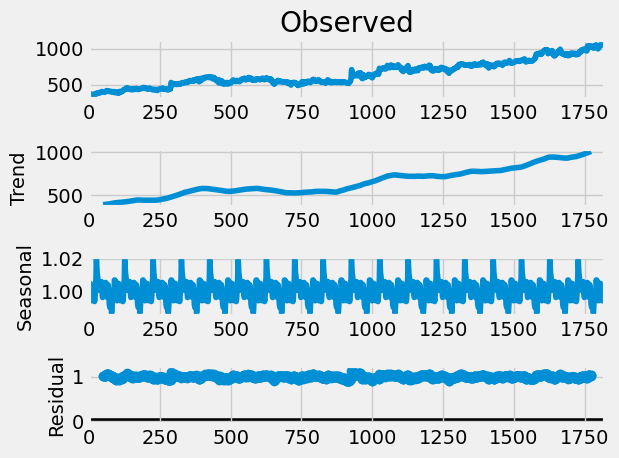

In [265]:
fig=m.plot()

In [266]:
from statsmodels.tsa.stattools import adfuller

In [267]:
def st_check(timeseries):
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#Lags used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)
    
    
st_check(data.Close)

Test statistic                   -0.232731
p-value                           0.934506
#Lags used                        5.000000
Number of Observations Used    1817.000000
Critical Value(1%)               -3.433954
Critical Value(5%)               -2.863132
Critical Value(10%)              -2.567618
dtype: float64


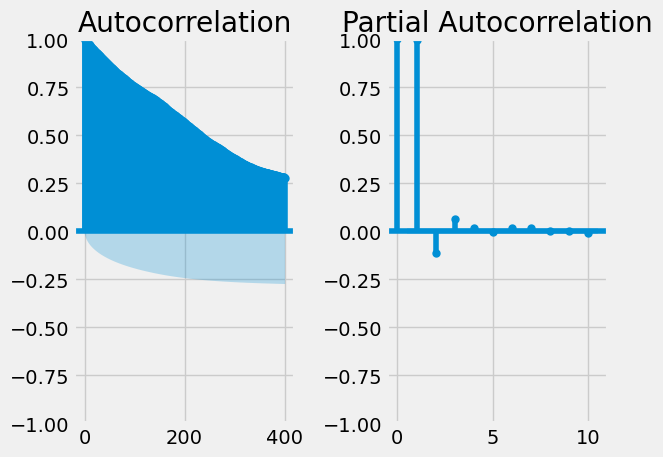

In [268]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt

l = (1, 2)
a = plt.subplot2grid(l, (0, 0))
p = plt.subplot2grid(l, (0, 1))

smt.plot_acf(data.Close , lags=400, ax=a, alpha=0.5)
smt.plot_pacf(data.Close , lags=10, ax=p, alpha=0.5)

plt.tight_layout()
plt.show()


In [269]:
model_df = data.loc[:, ['date', 'Close']].rename(columns={"date": "ds", "Close": "y"})
model_df.head()

,ds,y
0,02/01/13,359.288177
1,03/01/13,359.496826
2,04/01/13,366.600616
3,05/01/13,369.244832
4,06/01/13,367.666599


In [270]:
model = Prophet(yearly_seasonality = True, interval_width = 0.95)
model.fit(model_df)

17:47:58 - cmdstanpy - INFO - Chain [1] start processing
17:47:58 - cmdstanpy - INFO - Chain [1] done processing


In [271]:
ft = model.make_future_dataframe(periods = 100)
pred = model.predict(ft)
pred[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1918,2018-04-04,1081.985782,980.096245,1166.914975
1919,2018-04-05,1083.343778,993.737698,1172.658824
1920,2018-04-06,1081.456319,993.735729,1180.886340
1921,2018-04-07,1081.181481,990.948551,1178.982205
1922,2018-04-08,1081.267430,992.524557,1172.952955


Text(0.5, 1.0, 'Google Stock Prices')

<Figure size 1600x800 with 0 Axes>

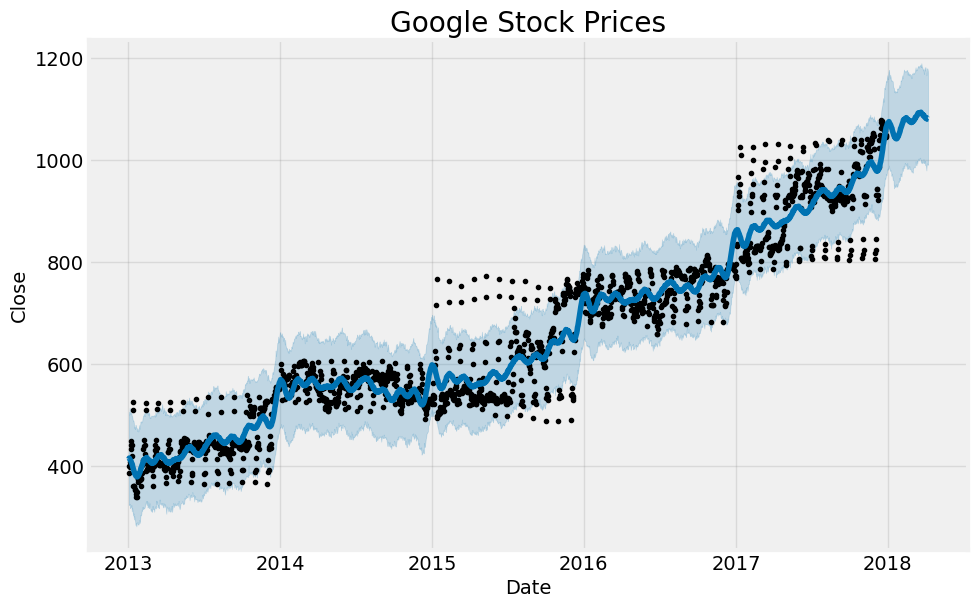

In [272]:
plt.figure(figsize=(16,8))
model.plot(pred, xlabel = 'Date',ylabel = 'Close')
plt.title('Google Stock Prices')

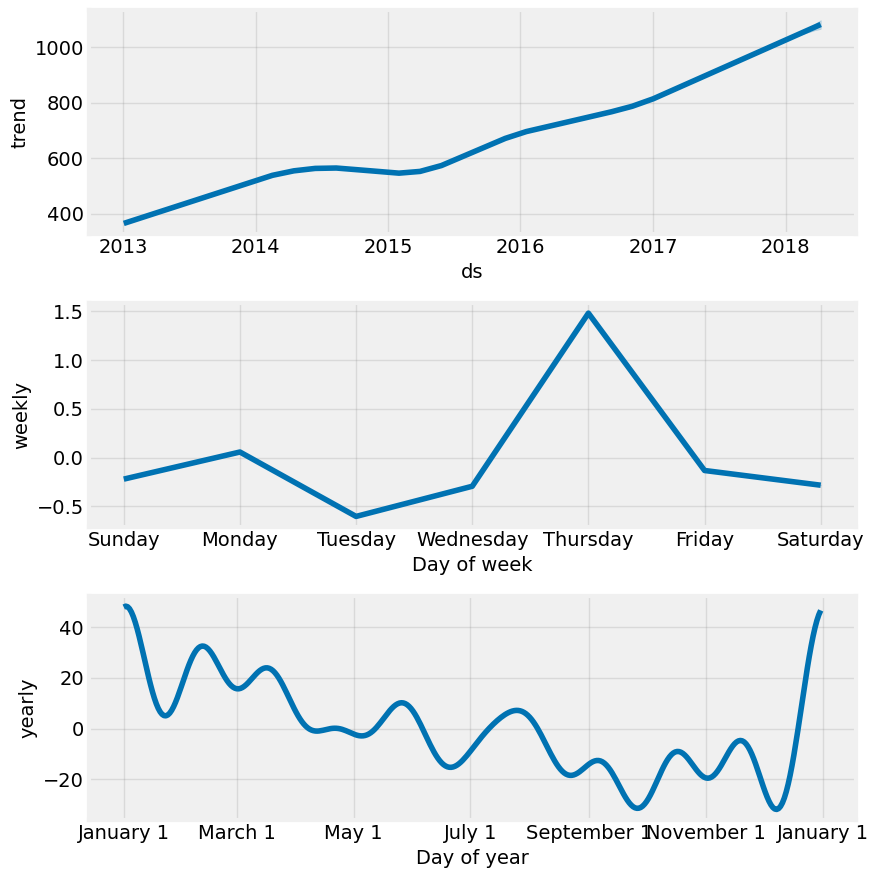

In [273]:
fig = model.plot_components(pred)

In [274]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
def optimization_function (changepoint_prior_scale, seasonality_prior_scale):
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale)
    cross_val = cross_validation(model, horizon = '100 days', parallel = 'processes')
    perf_m = performance_metrics (cross_val, rolling_window = 1)
    rmse = (perf_m,['rmse'].value[0])
    print(rmse)
    return rmse

In [100]:
!pip install bayesian-optimization

In [275]:
from pandas.core.common import random_state
from bayes_opt import BayesianOptimization
parameters = {'changepoint_prior_scale': [0.001, 0.5],
              'seasonalit_prior_scale':[0.01, 10],
}

optimizer = BayesianOptimization (
    f = optimization_function,
    pbounds = parameters,
    random_state = 42,)

In [276]:
params_grid = { 'changepoint_prior_scale': [0.1,0.2,0.3,0.4,0.5],
               'holidays_prior_scale': [0.1,0.2,0.3,0.4,0.5],
               'n_changepoints': [100,150,200],
               'seasonality_mode': ('multiplicative', 'additive')    
}

In [277]:
from sklearn.model_selection import ParameterGrid
import random

In [278]:
par = ParameterGrid(params_grid)

In [240]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in par:
    test=pd.DataFrame()
    print(p)
    random.seed(0)
    train_model = Prophet( changepoint_prior_scale = p['changepoint_prior_scale'],
                          holidays_prior_scale = p['holidays_prior_scale'],
                          n_changepoints = p['n_changepoints'],
                          seasonality_mode = p['seasonality_mode'],
                          weekly_seasonality=True,
                          daily_seasonality=True,
                          yearly_seasonality=True,
                          interval_width = 0.95)
    train_model.fit(model_df)
    train_forecast = train_model.make_future_dataframe(periods=100, freq='D')
    train_forecast = train_model.predict(train_forecast)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:11:59 - cmdstanpy - INFO - Chain [1] start processing
13:12:00 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:12:01 - cmdstanpy - INFO - Chain [1] start processing
13:12:02 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:12:03 - cmdstanpy - INFO - Chain [1] start processing
13:12:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:12:05 - cmdstanpy - INFO - Chain [1] start processing
13:12:06 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:12:07 - cmdstanpy - INFO - Chain [1] start processing
13:12:08 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:12:10 - cmdstanpy - INFO - Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:12:12 - cmdstanpy - INFO - Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:12:14 - cmdstanpy - INFO - Chain [1] start processing
13:12:14 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:12:15 - cmdstanpy - INFO - Chain [1] start processing
13:12:17 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:12:18 - cmdstanpy - INFO - Chain [1] start processing
13:12:19 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:12:20 - cmdstanpy - INFO - Chain [1] start processing
13:12:21 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:12:22 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:12:24 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:12:27 - cmdstanpy - INFO - Chain [1] start processing
13:12:27 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:12:28 - cmdstanpy - INFO - Chain [1] start processing
13:12:29 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:12:31 - cmdstanpy - INFO - Chain [1] start processing
13:12:31 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:12:32 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:12:35 - cmdstanpy - INFO - Chain [1] start processing
13:12:36 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:12:37 - cmdstanpy - INFO - Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:12:39 - cmdstanpy - INFO - Chain [1] start processing
13:12:39 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:12:41 - cmdstanpy - INFO - Chain [1] start processing
13:12:42 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:12:43 - cmdstanpy - INFO - Chain [1] start processing
13:12:44 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:12:45 - cmdstanpy - INFO - Chain [1] start processing
13:12:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:12:48 - cmdstanpy - INFO - Chain [1] start processing
13:12:48 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:12:49 - cmdstanpy - INFO - Chain [1] start processing
13:12:50 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:12:52 - cmdstanpy - INFO - Chain [1] start processing
13:12:52 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:12:53 - cmdstanpy - INFO - Chain [1] start processing
13:12:55 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:12:56 - cmdstanpy - INFO - Chain [1] start processing
13:12:56 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:12:57 - cmdstanpy - INFO - Chain [1] start processing
13:12:59 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:13:00 - cmdstanpy - INFO - Chain [1] start processing
13:13:00 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:13:02 - cmdstanpy - INFO - Chain [1] start processing
13:13:03 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:13:04 - cmdstanpy - INFO - Chain [1] start processing
13:13:05 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:13:06 - cmdstanpy - INFO - Chain [1] start processing
13:13:07 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:13:08 - cmdstanpy - INFO - Chain [1] start processing
13:13:09 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:13:10 - cmdstanpy - INFO - Chain [1] start processing
13:13:12 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:13:13 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:13:15 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:13:17 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:13:19 - cmdstanpy - INFO - Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:13:21 - cmdstanpy - INFO - Chain [1] start processing
13:13:22 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:13:23 - cmdstanpy - INFO - Chain [1] start processing
13:13:25 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:13:26 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:13:28 - cmdstanpy - INFO - Chain [1] start processing
13:13:29 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:13:30 - cmdstanpy - INFO - Chain [1] start processing
13:13:31 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:13:32 - cmdstanpy - INFO - Chain [1] start processing
13:13:33 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:13:34 - cmdstanpy - INFO - Chain [1] start processing
13:13:35 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:13:36 - cmdstanpy - INFO - Chain [1] start processing
13:13:38 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:40 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:42 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:13:43 - cmdstanpy - INFO - Chain [1] start processing
13:13:44 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:13:45 - cmdstanpy - INFO - Chain [1] start processing
13:13:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:13:47 - cmdstanpy - INFO - Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:13:49 - cmdstanpy - INFO - Chain [1] start processing
13:13:51 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:13:52 - cmdstanpy - INFO - Chain [1] start processing
13:13:53 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:13:54 - cmdstanpy - INFO - Chain [1] start processing
13:13:55 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:13:56 - cmdstanpy - INFO - Chain [1] start processing
13:13:57 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:13:58 - cmdstanpy - INFO - Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:14:01 - cmdstanpy - INFO - Chain [1] start processing
13:14:01 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:14:02 - cmdstanpy - INFO - Chain [1] start processing
13:14:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:14:06 - cmdstanpy - INFO - Chain [1] start processing
13:14:06 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:14:07 - cmdstanpy - INFO - Chain [1] start processing
13:14:09 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:14:11 - cmdstanpy - INFO - Chain [1] start processing
13:14:11 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:14:12 - cmdstanpy - INFO - Chain [1] start processing
13:14:14 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:16 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:14:17 - cmdstanpy - INFO - Chain [1] start processing
13:14:20 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:22 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:14:23 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:14:26 - cmdstanpy - INFO - Chain [1] start processing
13:14:27 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:14:28 - cmdstanpy - INFO - Chain [1] start processing
13:14:30 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:14:31 - cmdstanpy - INFO - Chain [1] start processing
13:14:32 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:14:33 - cmdstanpy - INFO - Chain [1] start processing
13:14:35 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:14:37 - cmdstanpy - INFO - Chain [1] start processing
13:14:38 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:14:39 - cmdstanpy - INFO - Chain [1] start processing
13:14:41 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:14:42 - cmdstanpy - INFO - Chain [1] start processing
13:14:43 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:14:44 - cmdstanpy - INFO - Chain [1] start processing
13:14:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:14:47 - cmdstanpy - INFO - Chain [1] start processing
13:14:48 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:14:49 - cmdstanpy - INFO - Chain [1] start processing
13:14:52 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:14:53 - cmdstanpy - INFO - Chain [1] start processing
13:14:54 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:14:56 - cmdstanpy - INFO - Chain [1] start processing
13:14:58 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:14:59 - cmdstanpy - INFO - Chain [1] start processing
13:14:59 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:15:01 - cmdstanpy - INFO - Chain [1] start processing
13:15:02 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:15:04 - cmdstanpy - INFO - Chain [1] start processing
13:15:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:08 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:10 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:15:11 - cmdstanpy - INFO - Chain [1] start processing
13:15:13 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:15:15 - cmdstanpy - INFO - Chain [1] start processing
13:15:15 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:15:20 - cmdstanpy - INFO - Chain [1] start processing
13:15:20 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:15:22 - cmdstanpy - INFO - Chain [1] start processing
13:15:24 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:15:25 - cmdstanpy - INFO - Chain [1] start processing
13:15:26 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:15:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:30 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:15:31 - cmdstanpy - INFO - Chain [1] start processing
13:15:32 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:15:33 - cmdstanpy - INFO - Chain [1] start processing
13:15:35 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:15:37 - cmdstanpy - INFO - Chain [1] start processing
13:15:37 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:15:39 - cmdstanpy - INFO - Chain [1] start processing
13:15:43 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:15:44 - cmdstanpy - INFO - Chain [1] start processing
13:15:45 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:15:46 - cmdstanpy - INFO - Chain [1] start processing
13:15:49 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:15:50 - cmdstanpy - INFO - Chain [1] start processing
13:15:51 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:15:52 - cmdstanpy - INFO - Chain [1] start processing
13:15:54 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:15:55 - cmdstanpy - INFO - Chain [1] start processing
13:15:56 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:16:03 - cmdstanpy - INFO - Chain [1] start processing
13:16:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:16:05 - cmdstanpy - INFO - Chain [1] start processing
13:16:07 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:16:08 - cmdstanpy - INFO - Chain [1] start processing
13:16:09 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:13 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:16:14 - cmdstanpy - INFO - Chain [1] start processing
13:16:15 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:16:16 - cmdstanpy - INFO - Chain [1] start processing
13:16:21 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:16:22 - cmdstanpy - INFO - Chain [1] start processing
13:16:23 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:16:24 - cmdstanpy - INFO - Chain [1] start processing
13:16:26 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:32 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:16:33 - cmdstanpy - INFO - Chain [1] start processing
13:16:34 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:16:36 - cmdstanpy - INFO - Chain [1] start processing
13:16:40 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:16:41 - cmdstanpy - INFO - Chain [1] start processing
13:16:42 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:16:44 - cmdstanpy - INFO - Chain [1] start processing
13:16:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:16:48 - cmdstanpy - INFO - Chain [1] start processing
13:16:48 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:16:50 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:16:54 - cmdstanpy - INFO - Chain [1] start processing
13:16:54 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:16:56 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:17:08 - cmdstanpy - INFO - Chain [1] start processing
13:17:09 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:12 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:17:13 - cmdstanpy - INFO - Chain [1] start processing
13:17:14 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:19 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:17:20 - cmdstanpy - INFO - Chain [1] start processing
13:17:21 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:17:22 - cmdstanpy - INFO - Chain [1] start processing
13:17:26 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:17:28 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:17:30 - cmdstanpy - INFO - Chain [1] start processing
13:17:31 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:17:33 - cmdstanpy - INFO - Chain [1] start processing
13:17:33 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:17:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:38 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:17:39 - cmdstanpy - INFO - Chain [1] start processing
13:17:40 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:17:42 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:17:47 - cmdstanpy - INFO - Chain [1] start processing
13:17:48 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:17:49 - cmdstanpy - INFO - Chain [1] start processing
13:17:51 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:17:52 - cmdstanpy - INFO - Chain [1] start processing
13:17:53 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:17:54 - cmdstanpy - INFO - Chain [1] start processing
13:17:57 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:17:58 - cmdstanpy - INFO - Chain [1] start processing
13:17:59 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:18:01 - cmdstanpy - INFO - Chain [1] start processing
13:18:05 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:18:06 - cmdstanpy - INFO - Chain [1] start processing
13:18:07 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:18:08 - cmdstanpy - INFO - Chain [1] start processing
13:18:10 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:18:11 - cmdstanpy - INFO - Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:17 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:18:18 - cmdstanpy - INFO - Chain [1] start processing
13:18:19 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:18:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:18:27 - cmdstanpy - INFO - Chain [1] start processing
13:18:28 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:18:29 - cmdstanpy - INFO - Chain [1] start processing
13:18:30 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:18:32 - cmdstanpy - INFO - Chain [1] start processing
13:18:33 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:18:34 - cmdstanpy - INFO - Chain [1] start processing
13:18:37 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:18:39 - cmdstanpy - INFO - Chain [1] start processing
13:18:40 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:18:41 - cmdstanpy - INFO - Chain [1] start processing
13:18:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing


In [241]:
train_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,398.793856,325.783191,663.486313,398.793856,398.793856,96.568777,96.568777,96.568777,62.224224,...,2.566326,2.566326,2.566326,31.778227,31.778227,31.778227,0.0,0.0,0.0,495.362633
1,2013-01-03,399.027806,308.484096,656.243140,399.027806,399.027806,92.036236,92.036236,92.036236,62.224224,...,-2.220694,-2.220694,-2.220694,32.032706,32.032706,32.032706,0.0,0.0,0.0,491.064042
2,2013-01-04,399.261755,320.869375,670.597991,399.261755,399.261755,95.198298,95.198298,95.198298,62.224224,...,1.067301,1.067301,1.067301,31.906773,31.906773,31.906773,0.0,0.0,0.0,494.460053
3,2013-01-05,399.495704,334.405609,669.016410,399.495704,399.495704,94.579173,94.579173,94.579173,62.224224,...,0.945175,0.945175,0.945175,31.409774,31.409774,31.409774,0.0,0.0,0.0,494.074877
4,2013-01-06,399.729653,329.094051,665.572510,399.729653,399.729653,94.979195,94.979195,94.979195,62.224224,...,2.196377,2.196377,2.196377,30.558594,30.558594,30.558594,0.0,0.0,0.0,494.708849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2018-04-04,893.683526,778.951122,1130.181415,889.270472,898.424025,67.698104,67.698104,67.698104,62.224224,...,2.566326,2.566326,2.566326,2.907554,2.907554,2.907554,0.0,0.0,0.0,961.381630
1919,2018-04-05,894.108738,789.772661,1115.411075,889.640968,898.924243,61.670965,61.670965,61.670965,62.224224,...,-2.220694,-2.220694,-2.220694,1.667435,1.667435,1.667435,0.0,0.0,0.0,955.779703
1920,2018-04-06,894.533950,788.010722,1122.655410,889.962479,899.422501,63.815862,63.815862,63.815862,62.224224,...,1.067301,1.067301,1.067301,0.524337,0.524337,0.524337,0.0,0.0,0.0,958.349811
1921,2018-04-07,894.959161,787.404990,1130.351739,890.311361,899.920760,62.663823,62.663823,62.663823,62.224224,...,0.945175,0.945175,0.945175,-0.505576,-0.505576,-0.505576,0.0,0.0,0.0,957.622985
